# Clustering Part I

### K-means clustering - example I

In [51]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

<b>Ex.1</b>

In [6]:
 help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

<b>Ex.2</b>

In [7]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

<b>Ex.3</b>

In [8]:
X.shape

(120, 2)

In [5]:
y.shape

(120,)

<b>Ex.4</b>

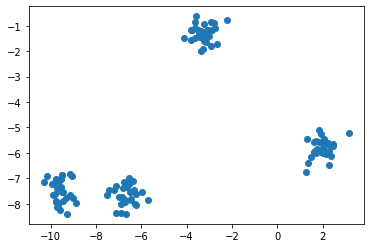

In [9]:
plt.scatter(X[:,0], X[:,1])

<b>Ex. 5</b>

In [15]:
model = KMeans(init='random', n_clusters=4)
model.fit(X, y)
pred = model.predict(X)

<b>Ex. 6</b>

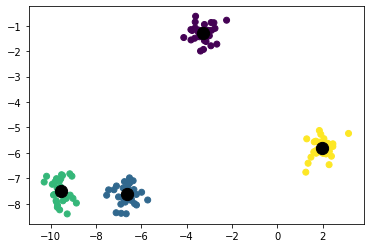

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=150);

### K-means clustering - example II

<b>Ex. 1</b>

In [17]:
X2, y2 = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

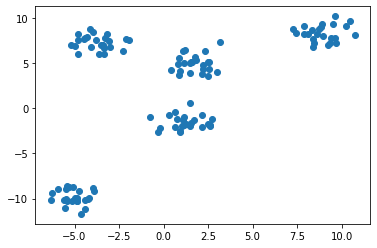

In [19]:
plt.scatter(X2[:,0], X2[:,1])

<b>Ex. 2</b>

In [40]:
model = KMeans(init='random', n_clusters=5)
model.fit(X2, y2)
pred = model.predict(X2)

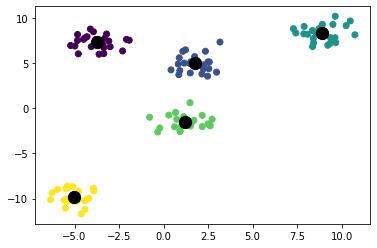

In [41]:
plt.scatter(X2[:, 0], X2[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=150);

In [42]:
print("Inertia:", model.inertia_)

Inertia: 163.4028808942599


<b>Ex. 3</b>

In [43]:
model = KMeans(init='random', n_clusters=2)
model.fit(X2, y2)
pred = model.predict(X2)

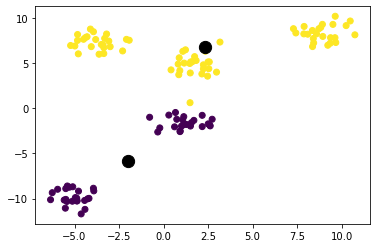

In [44]:
plt.scatter(X2[:, 0], X2[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=150);

In [45]:
print("Inertia:", model.inertia_)

Inertia: 3524.595571548407


### K-means ++

<b>Ex. 1</b>

In [34]:
model = KMeans(init='k-means++', n_clusters=5)
model.fit(X2, y2)
pred = model.predict(X2)

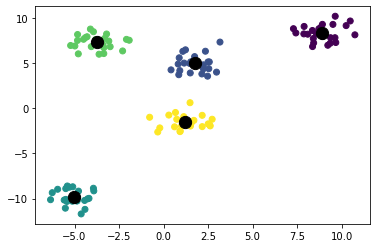

In [35]:
plt.scatter(X2[:, 0], X2[:, 1], c=pred)

cluster_centers = model.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=150);

<b>Ex. 2</b>

In [38]:
print("Inertia:", model.inertia_)

Inertia: 163.4028808942599


### Elbow method

<b>Ex. 1</b>

In [56]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

cluster_cnt = range(1, 16)
inertia_values = [KMeans(init='k-means++', n_clusters=clusters).fit(X, y).inertia_ for clusters in cluster_cnt];

<b>Ex. 2</b>

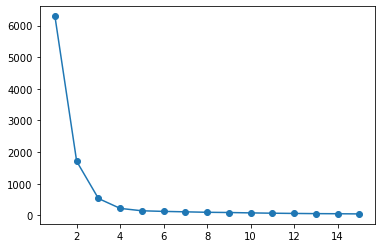

In [57]:
plt.plot(cluster_cnt, inertia_values, marker='o')

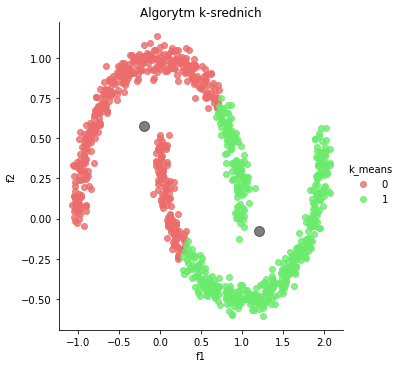

In [52]:
from sklearn.datasets import make_moons
import seaborn as sns
 
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

model = KMeans(init='k-means++', n_clusters=2)
model.fit(x, y)
y_km = model.predict(x)
centers = model.cluster_centers_
 
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

## Clustering II - hierarchical methods

### Dendrograms

In [60]:
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=0)

<b>Ex. 1</b>

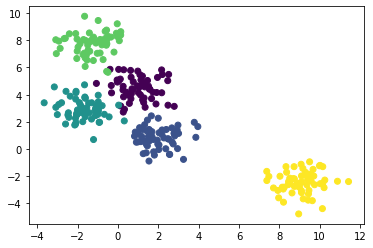

In [65]:
plt.scatter(X[:,0], X[:,1], c=y_true)

<b>Ex. 2</b>

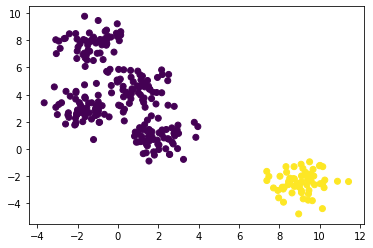

In [69]:
model = KMeans(init='random', n_clusters=2)
model.fit(X, y_true)
pred = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)

<b>Ex. 3</b>

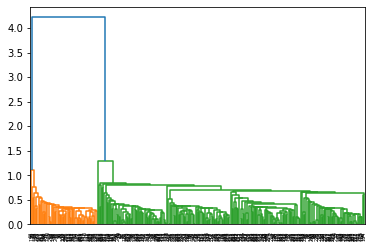

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage

lnk = linkage(X)
dnd = dendrogram(lnk)